<a href="https://colab.research.google.com/github/Qan123/Machine-Learning/blob/main/Missing_Values_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('loan-eligibility.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
df.notna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,True,True,True,True,True,True,True,True,True,True
610,True,True,True,True,True,True,True,True,True,True,True,True,True
611,True,True,True,True,True,True,True,True,True,True,True,True,True
612,True,True,True,True,True,True,True,True,True,True,True,True,True


In [54]:
df.notna().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [55]:
[i for i in df.columns if df[i].notna().sum()>0]

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [56]:
df.isna().sum().sum()

149

In [57]:
df1 = df.dropna(axis = 0, how='any', inplace=False)
df1.shape, df1.isna().sum()

((480, 13),
 Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64)

In [58]:
df1 = df.dropna(axis = 1, how='any', inplace=False)
df1.shape, df1.isna().sum()

((614, 6),
 Loan_ID              0
 Education            0
 ApplicantIncome      0
 CoapplicantIncome    0
 Property_Area        0
 Loan_Status          0
 dtype: int64)

### Imputing missing values

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

                arbitrary

In [61]:
df1 = df.fillna(value = 'missing')
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
df1 = df.copy()
df1['Dependents'].fillna(value = 0, inplace = True)
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

                      mean

In [63]:
df1['LoanAmount'].mean(), df1['Credit_History'].mean()

(146.41216216216216, 0.8421985815602837)

In [64]:
df1['LoanAmount'] = df['LoanAmount'].fillna(value = df['LoanAmount'].mean())
df1['Credit_History'] = df['Credit_History'].fillna(value = df['Credit_History'].mean())
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

        
                mode

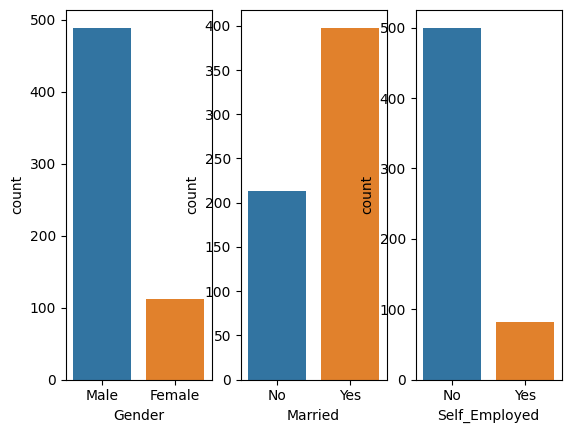

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
sns.countplot(x = 'Gender', data=df, ax=ax1)
sns.countplot(x = 'Married', data=df, ax=ax2)
sns.countplot(x= 'Self_Employed', data=df, ax=ax3)
plt.show()

In [66]:
df1['Gender'] = df['Gender'].fillna(value = df['Gender'].mode()[0])
df1['Married'] = df['Married'].fillna(value = df['Married'].mode()[0])
df1['Self_Employed'] = df['Self_Employed'].fillna(value = df['Self_Employed'].mode()[0])
df1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

            meadian

In [67]:
df1.Loan_Amount_Term = df.Loan_Amount_Term.fillna(value = df.Loan_Amount_Term.mean())
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Comparision









In [68]:
df['LoanAmount_mean'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount_median'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
print("Variance of original LoanAmount with missing values:", np.var(df['LoanAmount']))
print("Variance of imputed LoanAmount with mean:", np.var(df['LoanAmount_mean']))
print("Variance of imputed LoanAmount with median:", np.var(df['LoanAmount_median']))

Variance of original LoanAmount with missing values: 7312.816608838567
Variance of imputed LoanAmount with mean: 7050.793863896469
Variance of imputed LoanAmount with median: 7062.505490774437


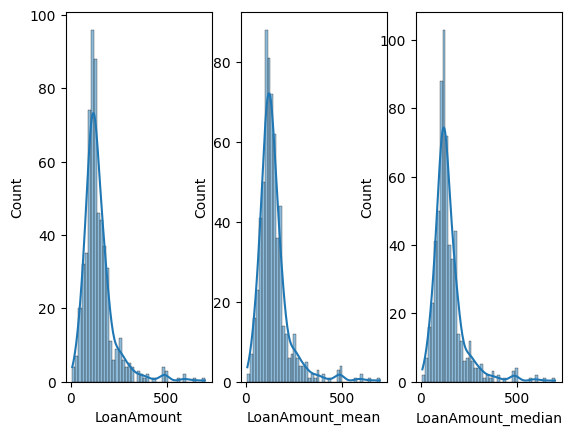

In [69]:
df['LoanAmount_mean'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount_median'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
sns.histplot(df['LoanAmount'], kde=True, ax=ax1)
sns.histplot(df['LoanAmount_mean'], kde=True, ax=ax2)
sns.histplot(df['LoanAmount_median'], kde=True, ax=ax3)
plt.show();

Handling Missing Values using Scikit-Learn
Transformers

In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,LoanAmount_median
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,146.412162,128.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.000000,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,66.000000,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,120.000000,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,141.000000,141.0


In [71]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_mean       0
LoanAmount_median     0
dtype: int64

In [72]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value=0)

In [73]:
imp.fit(df.iloc[:, 3:4])

SimpleImputer(fill_value=0, strategy='constant')

In [74]:
df.iloc[:, 3:4] = imp.transform(df.iloc[:, 3:4])

In [75]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_mean       0
LoanAmount_median     0
dtype: int64

In [79]:
imp = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
df.iloc[:, [1,2,5]] = imp.fit_transform(df.iloc[:, [1,2,5]])

In [80]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_mean       0
LoanAmount_median     0
dtype: int64

In [81]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df.iloc[:,8:11] = imp.fit_transform(df.iloc[:,8:11])

In [82]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_mean      0
LoanAmount_median    0
dtype: int64

### Column Imputer

In [87]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# create the transformers
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

column_trans = ColumnTransformer(
 [('impute_dep', imp_const, [3]),
 ('impute_gend-marr-emp', imp_mode, [1,2,5]),
 ('impute_loan-amt-cr', imp_mean, [8,9,10])],
 remainder='passthrough')

result_arr = column_trans.fit_transform(df)
print(result_arr)
print(result_arr.shape)

[['0' 'Male' 'No' ... 'Y' 146.41216216216216 128.0]
 ['1' 'Male' 'Yes' ... 'N' 128.0 128.0]
 ['0' 'Male' 'Yes' ... 'Y' 66.0 66.0]
 ...
 ['1' 'Male' 'Yes' ... 'Y' 253.0 253.0]
 ['2' 'Male' 'Yes' ... 'Y' 187.0 187.0]
 ['0' 'Female' 'No' ... 'N' 133.0 133.0]]
(614, 15)


In [88]:
df_imputed = pd.DataFrame(data=result_arr, columns = df.columns)
df_imputed.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_mean      0
LoanAmount_median    0
dtype: int64

## Multivariate Imputation

In [89]:
import pandas as pd
X = pd.DataFrame({
 'x1':[np.nan,2,3,4,5],
 'x2':[6,np.nan,8,9,10],
 'x3':[11,12,np.nan,14,15],
 'x4':[16,17,18,19,np.nan]
 })
X

,x1,x2,x3,x4
0,NaN,6.0,11.0,16.0
1,2.0,NaN,12.0,17.0
2,3.0,8.0,NaN,18.0
3,4.0,9.0,14.0,19.0
4,5.0,10.0,15.0,NaN


In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [92]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(estimator = lr, missing_values =np.nan , initial_strategy= 'mean', max_iter =10)
type(imp)

sklearn.impute._iterative.IterativeImputer

In [93]:
imp.fit_transform(X)

array([[ 1.,  6., 11., 16.],
       [ 2.,  7., 12., 17.],
       [ 3.,  8., 13., 18.],
       [ 4.,  9., 14., 19.],
       [ 5., 10., 15., 20.]])

In [95]:
import pandas as pd
X = pd.DataFrame({
 'x1':[23,np.nan, 13, 30,25],
 'x2':[np.nan, 35,41,np.nan,50],
 'x3':[57,58,61,71,69],
 'x4':[11,2,8,np.nan, np.nan]
 })
X

,x1,x2,x3,x4
0,23.0,NaN,57,11.0
1,NaN,35.0,58,2.0
2,13.0,41.0,61,8.0
3,30.0,NaN,71,NaN
4,25.0,50.0,69,NaN


In [96]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=2)
type(knn_imp)

sklearn.impute._knn.KNNImputer

In [97]:
knn_imp.fit_transform(X)

array([[23. , 38. , 57. , 11. ],
       [18. , 35. , 58. ,  2. ],
       [13. , 41. , 61. ,  8. ],
       [30. , 42.5, 71. ,  6.5],
       [25. , 50. , 69. ,  9.5]])